## Exploring Text Data

Working with text is generally more challenging than working with numerical data. Hence, any kind of technique that helps in generating an intuition of the existing dataset is welcome. One of the simplest approach to understand any text document or to compare multiple documents can be to compute a frequency table of individual words present in the document/documents and use it to conduct further experiements like: finding top words per document, finding top common words among documents etc.

In our case, we have taken the challenge of Analyzing Sentiments from Twitter data, so we will focus on how to generate word frequencies and use it to create **Word Clouds** in Python that will help us get a better overall understanding of the dataset.

**Note:-** We are using the same dataset from `tweets.csv` that we used earlier. You can get it [here.](https://studio.trainings.analyticsvidhya.com/assets/courseware/v1/aa0ae6514e0be95f11be85b84d4fd6d2/asset-v1:AnalyticsVidhya+NLP101+2018_T1+type@asset+block/tweets.csv)

### Table of Contents
1. About the Dataset
2. Generating Word Frequency
3. EDA using Word Clouds
4. Why to Preprocess text data?
5. Challenge

### 1. About the Dataset

The dataset that we are going to use is the same dataset of tweets from Twitter that will be used in module 8 for **Social Media Information Extraction**. You can download it from [here.](https://studio.trainings.analyticsvidhya.com/assets/courseware/v1/aa0ae6514e0be95f11be85b84d4fd6d2/asset-v1:AnalyticsVidhya+NLP101+2018_T1+type@asset+block/tweets.csv)
Let's load the dataset using pandas and have a quick look at some sample tweets. 

In [17]:
#Load the dataset
import pandas as pd 
dataset = pd.read_csv('tweets.csv', encoding = 'ISO-8859-1')

dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


As can be seen above, **text** column is of interest to us as it contains the tweet. At this point, you don't have to worry about other columns as that will be handled in future modules. Let's go ahead and inspect some of the tweets.

### 2. Generating Word Frequency

Let's first generate a frequency table of all the words present in all the tweets combined.

In [18]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(dataset.text.str)

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
of                          4053
#Demonetization             3253
demonetization              3162
on                          2751
#demonetization             2474
PM                          2384
Modi                        2379
India                       2243
and                         2220
a                           2180
that                        2168
out                         1729
for                         1672
so                          1599
had                         1598
who                         1591
Narendra                    1564
by                          1488
rich                        1477
find                        1421
Dear                        1407
implement                   1399
actually                    1370
have                        1315
@evanspiegel                1306
          

In [23]:
freq = gen_freq(dataset.text.str)

### 3. EDA using Word Clouds

Now that you have succesfully created a frequency table, you can use that to create multiple **visualizations** in the form of word clouds. Sometimes, the quickest way to understand the context of the text data is using a word cloud of top 100-200 words. Let's see how to create that in Python.

**Note:-** You'll use the `WordCloud` library of Python. You can install it by - 

`pip install wordcloud`

In [4]:
!pip install wordcloud

    100% |████████████████████████████████| 163kB 1.4MB/s ta 0:00:01


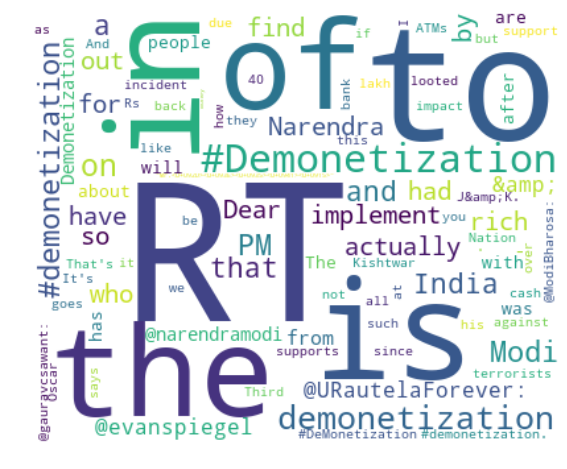

In [24]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**Few things to Note:-**

1. There is noise in the form of "RT" and "&amp" which can be removed from the word frequency.
2. Stop words like "the", "in", "to", "of" etc. are obviously ranking among the top frequency words but these are just constructs of the English language and are not specific to the people's tweets.
3. Words like "demonetization" have occured multiple times. The reason for this is that the current text is not **Normalized** so words like "demonetization", "Demonetization" etc. are all considered as different words.

The above are some of the problems that we need to address in order to make better visualization. Let's solve some of the problems!

#### Text Cleaning

You have already learnt how to utilize Regex to do text cleaning, that is precisely what we are doing here.

In [25]:
import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

The above will solve problems related to RT, &amp and also the problem of counting same word twice due to case difference. Yet we can do better, let's remove the common stop words.

#### Stop words Removal
WordCloud provides its own stopwords list. You can have a look at it by- 


In [26]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{"where's", 'do', 'for', 'not', 'all', 'doing', "they'll", "wouldn't", "they've", 'the', "shouldn't", "we'll", "there's", "doesn't", 'over', "she'll", 'from', "he'd", "how's", "can't", "who's", 'under', 'more', 'itself', 'down', 'again', "that's", 'her', 'to', "won't", 'with', 'any', "isn't", 'just', "didn't", 'because', 'so', 'r', 'me', 'once', 'own', 'above', 'cannot', 'did', "don't", 'why', 'hers', 'our', 'here', 'there', 'we', "couldn't", 'further', "we're", 'at', 'ourselves', 'have', 'like', 'myself', 'yourself', "i'm", 'as', "he's", 'am', 'yours', 'them', "let's", 'same', 'into', 'then', 'only', 'those', 'your', 'i', "what's", "why's", 'shall', 'are', 'on', 'between', 'should', "wasn't", 'ever', "they'd", 'they', 'ought', 'being', 'up', 'also', 'most', "he'll", 'while', 'few', 'some', 'had', 'does', 'she', 'their', 'herself', "haven't", 'otherwise', 'than', 'when', 'since', 'him', "i'd", "mustn't", 'were', 'other', "you've", "you're", 'below', 'theirs', 'get', 'where', "i'll", "t

In [45]:
stops = list(STOPWORDS)

In [46]:
stops.append('<ed><u+00a0><u+00bd><ed><u+00b1><u+008f><ed><u+00a0><u+00bd><ed><u+00b1><u+008f><ed><u+00a0><u+00bd><ed><u+00b1><u+008f><ed><u+00a0><u+00bd><ed><u+00b1><u+008f><ed><u+00a0><u+00bd><ed><u+00b1><u+008f><ed><u+00a0><u+00bd><ed><u+00b1><u+008f><ed><u+00a0><u+00bd><ed><u+00b1><u+008f><ed><u+00a0><u+00bd><ed><u+00b1><u+008f>        100')

In [47]:
stops.append('lied<ed><u+00a0><u+00bd><ed><u+00b8><u+00b2>')

In [48]:
stops.append('')

["where's",
 'do',
 'for',
 'not',
 'all',
 'doing',
 "they'll",
 "wouldn't",
 "they've",
 'the',
 "shouldn't",
 "we'll",
 "there's",
 "doesn't",
 'over',
 "she'll",
 'from',
 "he'd",
 "how's",
 "can't",
 "who's",
 'under',
 'more',
 'itself',
 'down',
 'again',
 "that's",
 'her',
 'to',
 "won't",
 'with',
 'any',
 "isn't",
 'just',
 "didn't",
 'because',
 'so',
 'r',
 'me',
 'once',
 'own',
 'above',
 'cannot',
 'did',
 "don't",
 'why',
 'hers',
 'our',
 'here',
 'there',
 'we',
 "couldn't",
 'further',
 "we're",
 'at',
 'ourselves',
 'have',
 'like',
 'myself',
 'yourself',
 "i'm",
 'as',
 "he's",
 'am',
 'yours',
 'them',
 "let's",
 'same',
 'into',
 'then',
 'only',
 'those',
 'your',
 'i',
 "what's",
 "why's",
 'shall',
 'are',
 'on',
 'between',
 'should',
 "wasn't",
 'ever',
 "they'd",
 'they',
 'ought',
 'being',
 'up',
 'also',
 'most',
 "he'll",
 'while',
 'few',
 'some',
 'had',
 'does',
 'she',
 'their',
 'herself',
 "haven't",
 'otherwise',
 'than',
 'when',
 'since',
 'hi

Now that you know what all has to be changed to improve our word cloud, let's make some wordclouds. We'll call the previous functions of `clean_text()` and `gen_freq()` to perform cleaning and frequency computation operation respectively and drop the words present in `STOPWORDS` from the `word_freq` dictionary.

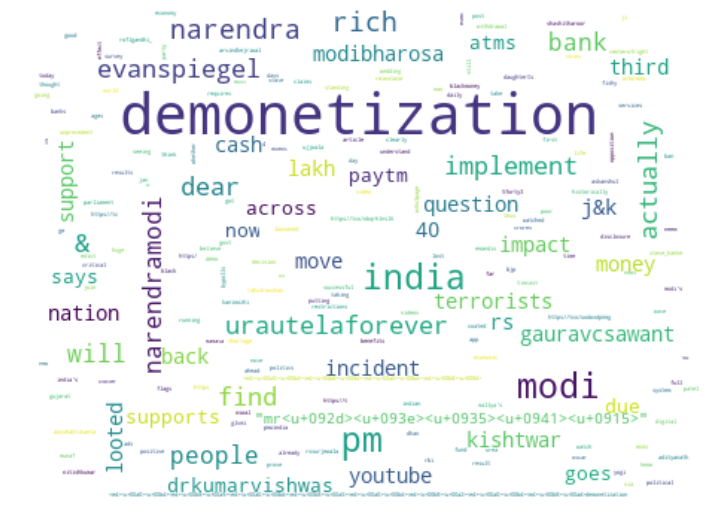

In [49]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=stops, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Now that you have succesfully created a wordcloud, you can get some insight into the areas of interest of the general twitter users:

 - It is evident that people are talking about govt. policies like **demonetization**, **J&K**. 
 - There are some personalitites that are mentioned numerous times like **evanspiegel**, **PM Narendra Modi**, **Dr Kumar Vishwas** etc.
 - There are also talks about **oscars**, **youtube** and **terrorists**
 - There are many sub-topics that revolve around demonetization like **atms**, **bank**, **cash**, **paytm** etc. Which tells that many people are concerned about it.
 
### 4. Why to Preprocess text data?

As you may have already seen that without performing preprocessing operations like cleaning, removing stopwords and changing case in the dataset the representation always comes out wrong. In this case, it was that the wordcloud was full of noise but in other cases it might be your Machine Learning model that is going to suffer.

Also something to note is even now some words are misreperesented for example: **modi**, **narendra** and **narendramodi** all refer to the same person. This can eaisly be solved by **Normalizing** our text which is a technique that you'll learn in future models.

## Tokenization + NLTK

In [57]:
import nltk

In [58]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [50]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [53]:
text = 'Tell me why you cried, and why you lied to me Tell me why you cried, and why you lied to me Well, I gave you everything I had But you left me sitting on my own Did you have to treat me oh, so bad All I do is hang my head and moanTell me why you cried, and why you lied to me Tell me why you cried, and why you lied to me'


In [54]:
text

'Tell me why you cried, and why you lied to me Tell me why you cried, and why you lied to me Well, I gave you everything I had But you left me sitting on my own Did you have to treat me oh, so bad All I do is hang my head and moanTell me why you cried, and why you lied to me Tell me why you cried, and why you lied to me'

In [59]:
sent_tokenize(text)

['Tell me why you cried, and why you lied to me Tell me why you cried, and why you lied to me Well, I gave you everything I had But you left me sitting on my own Did you have to treat me oh, so bad All I do is hang my head and moanTell me why you cried, and why you lied to me Tell me why you cried, and why you lied to me']

In [60]:
word_tokenize(text)

['Tell',
 'me',
 'why',
 'you',
 'cried',
 ',',
 'and',
 'why',
 'you',
 'lied',
 'to',
 'me',
 'Tell',
 'me',
 'why',
 'you',
 'cried',
 ',',
 'and',
 'why',
 'you',
 'lied',
 'to',
 'me',
 'Well',
 ',',
 'I',
 'gave',
 'you',
 'everything',
 'I',
 'had',
 'But',
 'you',
 'left',
 'me',
 'sitting',
 'on',
 'my',
 'own',
 'Did',
 'you',
 'have',
 'to',
 'treat',
 'me',
 'oh',
 ',',
 'so',
 'bad',
 'All',
 'I',
 'do',
 'is',
 'hang',
 'my',
 'head',
 'and',
 'moanTell',
 'me',
 'why',
 'you',
 'cried',
 ',',
 'and',
 'why',
 'you',
 'lied',
 'to',
 'me',
 'Tell',
 'me',
 'why',
 'you',
 'cried',
 ',',
 'and',
 'why',
 'you',
 'lied',
 'to',
 'me']

In [63]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()


print(stemmer.stem('lied'))

lie


In [65]:
from nltk import pos_tag

tokens = word_tokenize(text)
pos_tag(tokens)

[('Tell', 'VB'),
 ('me', 'PRP'),
 ('why', 'WRB'),
 ('you', 'PRP'),
 ('cried', 'VBD'),
 (',', ','),
 ('and', 'CC'),
 ('why', 'WRB'),
 ('you', 'PRP'),
 ('lied', 'VBD'),
 ('to', 'TO'),
 ('me', 'PRP'),
 ('Tell', 'VB'),
 ('me', 'PRP'),
 ('why', 'WRB'),
 ('you', 'PRP'),
 ('cried', 'VBD'),
 (',', ','),
 ('and', 'CC'),
 ('why', 'WRB'),
 ('you', 'PRP'),
 ('lied', 'VBD'),
 ('to', 'TO'),
 ('me', 'PRP'),
 ('Well', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ('gave', 'VBD'),
 ('you', 'PRP'),
 ('everything', 'NN'),
 ('I', 'PRP'),
 ('had', 'VBD'),
 ('But', 'CC'),
 ('you', 'PRP'),
 ('left', 'VBD'),
 ('me', 'PRP'),
 ('sitting', 'VBG'),
 ('on', 'IN'),
 ('my', 'PRP$'),
 ('own', 'JJ'),
 ('Did', 'NNP'),
 ('you', 'PRP'),
 ('have', 'VBP'),
 ('to', 'TO'),
 ('treat', 'VB'),
 ('me', 'PRP'),
 ('oh', 'UH'),
 (',', ','),
 ('so', 'RB'),
 ('bad', 'JJ'),
 ('All', 'NNP'),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ('is', 'VBZ'),
 ('hang', 'VB'),
 ('my', 'PRP$'),
 ('head', 'NN'),
 ('and', 'CC'),
 ('moanTell', 'VB'),
 ('me', 'PRP'),
 ('w

In [67]:
from nltk.corpus import wordnet

wordnet.synsets('lied')

[Synset('lied.n.01'),
 Synset('lie.v.01'),
 Synset('lie.v.02'),
 Synset('dwell.v.02'),
 Synset('lie.v.04'),
 Synset('lie.v.05'),
 Synset('lie.v.06'),
 Synset('lie_down.v.01')]

## Basic ML

In [68]:
dataset = pd.read_csv('/Users/aleksandr/Desktop/Basic NLP/asset-v1_AnalyticsVidhya+NLP101+2018_T1+type@asset+block@final_dataset_basicmlmodel.csv')


In [69]:
for index, tweet in enumerate(dataset["tweet"][10:15]):
    print(index+1,".",tweet)

1 .  â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex
2 . we are so selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking   #values #love #
3 . i get to see my daddy today!!   #80days #gettingfed
4 . ouch...junior is angryð#got7 #junior #yugyoem   #omg 
5 . i am thankful for having a paner. #thankful #positive     


In [70]:
def clean_text(text):
    #Filter to allow only alphabets
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    #Convert to lowercase to maintain consistency
    text = text.lower()
       
    return text

In [71]:
dataset['clean_text'] = dataset.tweet.apply(lambda x: clean_text(x))

In [72]:
STOP_WORDS = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'an', 'and',
              'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below',
              'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did',
              "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever',
              'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having',
              'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how',
              "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it',
              "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself',
              'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours',
              'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't", 'she', "she'd", "she'll", "she's",
              'should', "shouldn't", 'since', 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs',
              'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're",
              "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't",
              'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
              "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't",
              'www', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']

#Generate word frequency
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()
    
    #Drop the stopwords during the frequency calculation
    word_freq = word_freq.drop(STOP_WORDS, errors='ignore')
    
    return word_freq

#Check whether a negation term is present in the text
def any_neg(words):
    for word in words:
        if word in ['n', 'no', 'non', 'not'] or re.search(r"\wn't", word):
            return 1
    else:
        return 0

#Check whether one of the 100 rare words is present in the text
def any_rare(words, rare_100):
    for word in words:
        if word in rare_100:
            return 1
    else:
        return 0

#Check whether prompt words are present
def is_question(words):
    for word in words:
        if word in ['when', 'what', 'how', 'why', 'who']:
            return 1
    else:
        return 0

In [73]:
word_freq = gen_freq(dataset.clean_text.str)
#100 most rare words in the dataset
rare_100 = word_freq[-100:]
#Number of words in a tweet
dataset['word_count'] = dataset.clean_text.str.split().apply(lambda x: len(x))
#Negation present or not
dataset['any_neg'] = dataset.clean_text.str.split().apply(lambda x: any_neg(x))
#Prompt present or not
dataset['is_question'] = dataset.clean_text.str.split().apply(lambda x: is_question(x))
#Any of the most 100 rare words present or not
dataset['any_rare'] = dataset.clean_text.str.split().apply(lambda x: any_rare(x, rare_100))
#Character count of the tweet
dataset['char_count'] = dataset.clean_text.apply(lambda x: len(x))

In [74]:
gen_freq(dataset.clean_text.str)[:10]

user      3351
amp        439
love       320
day        254
trump      214
happy      207
will       191
people     186
new        171
u          158
dtype: int64

In [75]:
from sklearn.model_selection import train_test_split

X = dataset[['word_count', 'any_neg', 'any_rare', 'char_count', 'is_question']]
y = dataset.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=27)

In [76]:
from sklearn.naive_bayes import GaussianNB

#Initialize GaussianNB classifier
model = GaussianNB()
#Fit the model on the train dataset
model = model.fit(X_train, y_train)
#Make predictions on the test dataset
pred = model.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, pred)*100, "%")

Accuracy: 59.61904761904761 %
